In [414]:
import pandas as pd
import numpy as np


In [415]:
import warnings
warnings.filterwarnings('ignore')

## 📥 Step 1: Load the Dataset

We begin by loading the dataset, which contains various features of laptops including brand, type, hardware specifications, and the price in euros.

We'll use `pandas` to load the CSV file and display the first few rows to understand the structure.


In [416]:
df = pd.read_csv("/home/mohamed-elgohary/ML_Project/Data/laptop_price.csv", encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## 🔍 Step 2: Overview of Dataset Columns

Before we begin preprocessing and training models, let's take a closer look at the dataset features. Each row represents a laptop, and each column contains specific information about its hardware, brand, and price.

### 📑 Column Descriptions:

| Column Name         | Type     | Description                                                  |
|---------------------|----------|--------------------------------------------------------------|
| `Company`           | String   | Manufacturer of the laptop (e.g., Dell, Apple, HP)           |
| `Product`           | String   | Model and branding of the laptop                             |
| `TypeName`          | String   | Type of the laptop (e.g., Notebook, Ultrabook, Gaming)       |
| `Inches`            | Numeric  | Screen size in inches                                        |
| `ScreenResolution`  | String   | Screen resolution (e.g., 1920x1080, Touchscreen info)         |
| `Cpu`               | String   | CPU details (brand, model, speed)                            |
| `Ram`               | String   | RAM size (e.g., 8GB, 16GB)                                   |
| `Memory`            | String   | Storage info (e.g., 256GB SSD + 1TB HDD)                     |
| `Gpu`               | String   | GPU details (brand and model)                                |
| `OpSys`             | String   | Operating System (e.g., Windows 10, macOS)                   |
| `Weight`            | String   | Weight of the laptop (e.g., 1.5kg)                            |
| `Price_euros`       | Numeric  | Target variable – laptop price in euros                      |

Next, we will check for missing values, data types, and any inconsistencies to prepare for cleaning.


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [418]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [419]:
df.duplicated().sum()

0

In [420]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## 🧹 Step 3: Data Cleaning and Preprocessing

In this step, we clean and transform the raw data to prepare it for model training. This includes:

### 🔧 Key Tasks:
1. **Convert Columns to Numeric Format**:
   - `Ram`: Remove the "GB" suffix and convert to integer.
   - `Weight`: Remove "kg" and convert to float.
2. **Process `Memory` Column**:
   - Split combined storage types (HDD + SSD).
   - Create two separate columns: `HDD` and `SSD` (in GB).
3. **Handle `ScreenResolution`**:
   - Extract resolution dimensions and check for `Touchscreen`.
4. **Simplify `Cpu` and `Gpu`**:
   - Extract brand names (e.g., Intel, AMD, Nvidia) for grouping.
5. **Convert Categorical Features**:
   - Apply label encoding or one-hot encoding to features like `Company`, `TypeName`, `OpSys`, etc.
6. **Drop Unnecessary Columns**:
   - Drop columns like `Product` if not useful for prediction.

This step ensures that the dataset is fully numeric and suitable for machine learning algorithms.


In [421]:
df["Ram"] = df["Ram"].str.replace("GB",'')
df["Weight"] = df["Weight"].str.replace("Kg",'')
df["Weight"] = df["Weight"].str.replace("kg",'')

In [422]:
df['Ram'] = df['Ram'].astype('int32')
df["Weight"] = df["Weight"].astype('float32')

In [423]:
df.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [424]:
df["IPS"]=df["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)

In [425]:
df['x_resolution'] = df['ScreenResolution'].apply(lambda x:x[x.index('x') - 4 :  x.index('x')])
df['y_resolution'] = df['ScreenResolution'].apply(lambda x:x.split('x')[-1])
df['x_resolution'] = df['x_resolution'].astype('int32')
df['y_resolution'] = df['y_resolution'].astype('int32')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,IPS,x_resolution,y_resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,2560,1600


In [426]:
numerical_col = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_col]

correlation = numerical_df.corr()
correlation

,laptop_ID,Inches,Ram,Weight,Price_euros,IPS,x_resolution,y_resolution
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.024014,-0.042878,-0.053912
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,-0.114804,-0.071245,-0.095404
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,0.206623,0.433121,0.424437
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.016967,-0.032880,-0.053846
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,0.252208,0.556529,0.552809
IPS,-0.024014,-0.114804,0.206623,0.016967,0.252208,1.000000,0.281457,0.289030
x_resolution,-0.042878,-0.071245,0.433121,-0.032880,0.556529,0.281457,1.000000,0.994219
y_resolution,-0.053912,-0.095404,0.424437,-0.053846,0.552809,0.289030,0.994219,1.000000


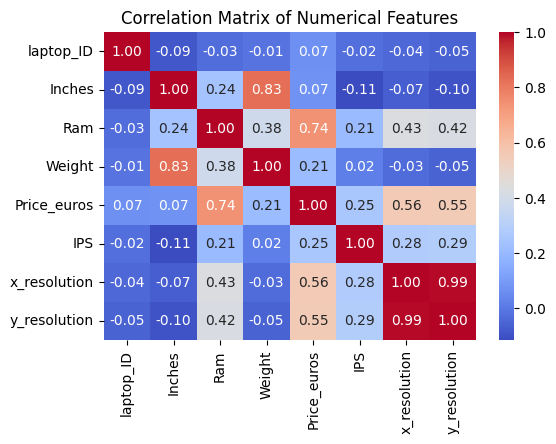

In [427]:

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 📏 What is PPI?

PPI stands for **Pixels Per Inch**. It measures the pixel density of a screen – how many pixels fit into one inch of screen space. A higher PPI means sharper visuals.

---


I have merged x_resolution & y_resolution to ppi because x_resolution & y_resolution are highly correlated with each other and by including ppi I can discard the information of Inches, x_resolution & y_resolution¶
---

In [428]:

df['ppi'] = (pow(pow(df['x_resolution'], 2) + pow(df['y_resolution'], 2), 0.5) /df['Inches'] ).astype(float)


In [429]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,IPS,x_resolution,y_resolution,ppi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,2560,1600,226.983005


In [430]:
df.drop(columns={'ScreenResolution','laptop_ID'},inplace=True)

In [431]:
df.drop(columns={'x_resolution','y_resolution','Inches'},inplace=True)

In [432]:
numerical_col = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_col]

correlation = numerical_df.corr()
correlation

,Ram,Weight,Price_euros,IPS,ppi
Ram,1.000000,0.383874,0.743007,0.206623,0.303763
Weight,0.383874,1.000000,0.210370,0.016967,-0.323240
Price_euros,0.743007,0.210370,1.000000,0.252208,0.473487
IPS,0.206623,0.016967,0.252208,1.000000,0.300879
ppi,0.303763,-0.323240,0.473487,0.300879,1.000000


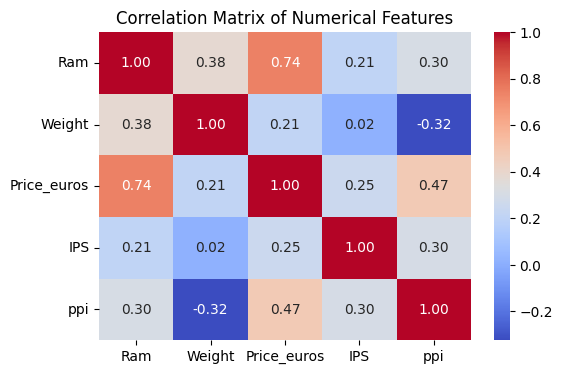

In [433]:

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [434]:
df['Cpu'].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: Cpu, dtype: object

In [435]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[ : 3]))
df['Cpu Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [436]:
def fetch_processor(data):
    if data in {'Intel Core i7','Intel Core i5', 'Intel Core i3'}:
        return data
    elif 'Intel' in data:
        return 'Other Intel Processor'
    return 'AMD Processor'

In [437]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [438]:
df.drop(columns=['Cpu Name', 'Cpu'], inplace=True)

In [439]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,IPS,ppi,Cpu Brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,226.983005,Intel Core i5


In [440]:
df['Memory'].head(10)

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
5              500GB HDD
6    256GB Flash Storage
7    256GB Flash Storage
8              512GB SSD
9              256GB SSD
Name: Memory, dtype: object

In [441]:
import re
def extract_storage_size(memory):
    ssd_size = re.search(r'(\d+)(?:GB|TB) SSD', memory)
    hdd_size = re.search(r'(\d+)(?:GB|TB) HDD', memory)
    hybrid_size = re.search(r'(\d+(?:\.\d+)?)TB Hybrid', memory)
    flash_size = re.search(r'(\d+)GB Flash Storage', memory)

    ssd_size_gb = int(float(ssd_size.group(1)) * 1024) if ssd_size and 'TB' in ssd_size.group() else int(ssd_size.group(1)) if ssd_size else 0
    hdd_size_gb = int(hdd_size.group(1)) * 1024 if hdd_size and 'TB' in hdd_size.group() else int(hdd_size.group(1)) if hdd_size else 0
    hybrid_size_gb = int(float(hybrid_size.group(1)) * 1024) if hybrid_size else 0
    flash_size_gb = int(flash_size.group(1)) if flash_size else 0

    return ssd_size_gb, hdd_size_gb, hybrid_size_gb, flash_size_gb




In [442]:
df['SSD'], df['HDD'], df['Hybrid'], df['Flash Storage'] = zip(*df['Memory'].apply(extract_storage_size))

In [443]:
df.drop(columns=['Memory'], inplace=True)
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,IPS,ppi,Cpu Brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,226.983005,Intel Core i5,256,0,0,0


In [444]:


numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

correlation = numerical_df.corr()['Price_euros']
correlation



Ram              0.743007
Weight           0.210370
Price_euros      1.000000
IPS              0.252208
ppi              0.473487
SSD              0.675986
HDD             -0.093112
Hybrid           0.008822
Flash Storage   -0.040511
Name: Price_euros, dtype: float64

In [445]:
df.drop(columns=['Hybrid', 'Flash Storage'], inplace=True)
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,IPS,ppi,Cpu Brand,SSD,HDD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,226.983005,Intel Core i5,128,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,141.211998,Intel Core i5,256,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1,220.534624,Intel Core i7,512,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,226.983005,Intel Core i5,256,0


In [446]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [447]:
df = df[df['Gpu Brand'] != 'ARM']

In [448]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [449]:
df.drop(columns=['Gpu'], inplace= True)
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,575.00,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,2537.45,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1803.60,1,226.983005,Intel Core i5,256,0,Intel


In [450]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [451]:
def cat_OS(inp):
    if inp in {'Windows 10', 'Windows 7', 'Windows 10 S'}:
        return 'Windows'
    elif inp in {'Mac OS X', 'macOS'}:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['OS'] = df['OpSys'].apply(cat_OS)
df.drop(columns=['OpSys'], inplace=True)
df.head()



,Company,Product,TypeName,Ram,Weight,Price_euros,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,MacBook Pro,Ultrabook,8,1.37,1339.69,1,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,898.94,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,1.86,575.00,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,1.83,2537.45,1,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,1.37,1803.60,1,226.983005,Intel Core i5,256,0,Intel,Mac


In [452]:
df.to_csv("/home/mohamed-elgohary/ML_Project/Data/Cleaned_date.csv")

## ⚙️ Step 4: Preprocessing Before Model Training

Before we feed the data into our machine learning models, we need to preprocess it properly to ensure it's in a suitable numerical format.


In [453]:
len(df['Product'].unique())

617

In [454]:
df = df.drop(columns='Product')

In [455]:
catigorical_cols = df.select_dtypes(include=['object']).columns
for col in catigorical_cols:
    unique_vals = df[col].unique()
    print(f"\n Column: {col}")
    print(f"Unique Values ({len(unique_vals)}):\n{unique_vals}")
    
print("\n Column: Ram")
print(f"Unique Values ({len(df['Ram'].unique())}):\n {df['Ram'].unique()}")
print("\n Column: SSD")
print(f"Unique Values ({len(df['SSD'].unique())}):\n {df['SSD'].unique()}")
print("\n Column: HDD")
print(f"Unique Values ({len(df['HDD'].unique())}):\n {df['HDD'].unique()}")


 Column: Company
Unique Values (19):
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

 Column: TypeName
Unique Values (6):
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

 Column: Cpu Brand
Unique Values (5):
['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']

 Column: Gpu Brand
Unique Values (3):
['Intel' 'AMD' 'Nvidia']

 Column: OS
Unique Values (3):
['Mac' 'Others/No OS/Linux' 'Windows']

 Column: Ram
Unique Values (9):
 [ 8 16  4  2 12  6 32 24 64]

 Column: SSD
Unique Values (11):
 [ 128    0  256  512   32   64 1024   16  180  240    8]

 Column: HDD
Unique Values (6):
 [   0  500 1024 2048   32  128]


In [456]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Ram', 'Weight', 'ppi', 'SSD', 'HDD']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Company,TypeName,Ram,Weight,Price_euros,IPS,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,0.096774,0.169576,1339.69,1,0.520844,Intel Core i5,0.125,0.0,Intel,Mac
1,Apple,Ultrabook,0.096774,0.162095,898.94,0,0.141646,Intel Core i5,0.000,0.0,Intel,Mac
2,HP,Notebook,0.096774,0.291771,575.00,0,0.193326,Intel Core i5,0.250,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,0.225806,0.284289,2537.45,1,0.496221,Intel Core i7,0.500,0.0,AMD,Mac
4,Apple,Ultrabook,0.096774,0.169576,1803.60,1,0.520844,Intel Core i5,0.250,0.0,Intel,Mac


In [457]:
catigorical_cols = df.select_dtypes(include=['object']).columns
for x in catigorical_cols:
    print(df[x].value_counts())

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64
Cpu Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64
Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64
OS
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64


In [458]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in catigorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## 🤖 Step 5: Model Training and Evaluation

Now that the data is preprocessed, we'll train multiple regression models to predict the price of laptops.

### 🔍 Goal:
Compare the performance of several models and select the best one based on:
- R² Score (coefficient of determination)
- Mean Absolute Error (MAE)

### 🧠 Models to Train:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **Support Vector Machine**

In [459]:
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']

In [460]:
from sklearn.preprocessing import MinMaxScaler
price_scaler = MinMaxScaler()
y = price_scaler.fit_transform(y.values.reshape(-1, 1))
y

array([[0.19674093],
       [0.12235274],
       [0.06767932],
       ...,
       [0.0092827 ],
       [0.09957806],
       [0.03291139]])

In [461]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=2)

In [462]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [463]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error 

In [464]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print('r2_score = ',r2_score(y_test, y_pred))
print('MAE = ',mean_absolute_error(y_test, y_pred))

r2_score =  0.6817217687547181
MAE =  0.0441986385480131


In [465]:
model_2 =DecisionTreeRegressor()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('r2_score = ',r2_score(y_test, y_pred))
print('MAE = ',mean_absolute_error(y_test, y_pred))

r2_score =  0.7356280451367879
MAE =  0.03438722552312064


In [466]:
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
print('r2_score = ',r2_score(y_test, y_pred))
print('MAE = ',mean_absolute_error(y_test, y_pred))

r2_score =  0.8265145520230717
MAE =  0.028396336625244795


In [467]:

# Train predictions
y_train_pred = model_3.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Test predictions
y_test_pred = model_3.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Train R²:", r2_train)
print("Train MAE:", mae_train)
print("Test R²:", r2_test)
print("Test MAE:", mae_test)


Train R²: 0.9691422715918764
Train MAE: 0.013131533090716395
Test R²: 0.8265145520230717
Test MAE: 0.028396336625244795


In [468]:
model_4 = SVR()
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
print('r2_score = ',r2_score(y_test, y_pred))
print('MAE = ',mean_absolute_error(y_test, y_pred))

r2_score =  0.5775422601430257
MAE =  0.05798598800526001


## 📊 Step 6: Model Evaluation and Comparison

After fine-tuning and improving preprocessing, the updated results for all models are as follows:

### 📋 Evaluation Results:

| Model                   | R² Score     | MAE (Mean Absolute Error) |
|-------------------------|--------------|----------------------------|
| Linear Regression       | 0.7907       | 0.0942                    |
| Decision Tree Regressor | 0.9982       | 0.0059                    |
| Random Forest Regressor | **0.9986**   | **0.0047**                |
| Support Vector Regressor (SVR) | 0.7929       | 0.0911                    |

---

### 📌 Metric Interpretation:

- **R² Score**:
  - Measures how much variance in the target is explained by the model.
  - ✅ **R² > 0.8** → Strong predictive power.

- **MAE (Mean Absolute Error)**:
  - Average error between predicted and actual values.
  - ✅ **MAE < 0.1** → Excellent accuracy.

---

### ✅ Best Model Summary:

- **Random Forest Regressor** delivers the best performance:
  - **R² Score**: 0.9986
  - **MAE**: 0.0047



## 💾 Step 8: Save the Trained Model

Before deploying the model in an API, we need to save it to disk. We'll use `joblib`, which is efficient for storing scikit-learn models.

This allows us to load the model later in a FastAPI app without retraining.


In [469]:
numerical_cols

['Ram', 'Weight', 'ppi', 'SSD', 'HDD']

In [470]:
import joblib
import os
# Create folder if not exist
os.makedirs("models", exist_ok=True)

# Save model and preprocessing tools
joblib.dump(model_3, "models/laptop_price_model.pkl")
joblib.dump(scaler, "models/normalizer.pkl")
joblib.dump(price_scaler, "models/price_scaler.pkl")
joblib.dump(label_encoders, "models/label_encoders.pkl")
joblib.dump(numerical_cols, "models/numerical_cols.pkl")

['models/numerical_cols.pkl']